# Centroid Accuracy

In this notebook we will look at how the Zernike polynomial estimation performance from the Wavefront Estimation Calculation changes as the accuracy of the donut centroid is degraded. To do this we will create different catalogs for the phosim donut generation and the wavefront analysis where the analysis catalogs have star positions slightly offset. Our performance metric in this first version will be the RMS value between OPD results and the Zernike polynomials given by `ts_wep` output.

## Offsets in the y-direction

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os
import sys
sys.path.append('../analysis_tools/')
from calcMetrics import calcMetrics

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data_dir = '/astro/store/epyc/projects/lsst_comm/ts_phosim/notebooks/analysis_data/centroid_offsets/'

In [8]:
calcCentroidMetrics = calcMetrics()

In [98]:
offset_array = np.arange(-40, 41, 10)
ang_array = [0]*len(offset_array)
ssrTotalVals = []
ssrFieldVals = []
for offset, ang in zip(offset_array, ang_array):
    opdZkFilePath = os.path.join(data_dir, 'opd.zer.centroid.%iang%i' % (offset, ang))
    wfsZkFilePath = os.path.join(data_dir, 'wfs.zer.centroid.%iang%i' % (offset, ang))
    opdData, wfsData = calcCentroidMetrics.loadZernikeData(opdZkFilePath, wfsZkFilePath)
    zerFieldSSR, zerTotalSSR = calcCentroidMetrics.calcSSR(opdData, wfsData)
    ssrFieldVals.append(zerFieldSSR)
    ssrTotalVals.append(zerTotalSSR)

(array([1.693917, 1.693918, 1.693919, 1.69392 , 1.693921, 1.693922,
        1.693923, 1.693924]), <a list of 8 Text yticklabel objects>)

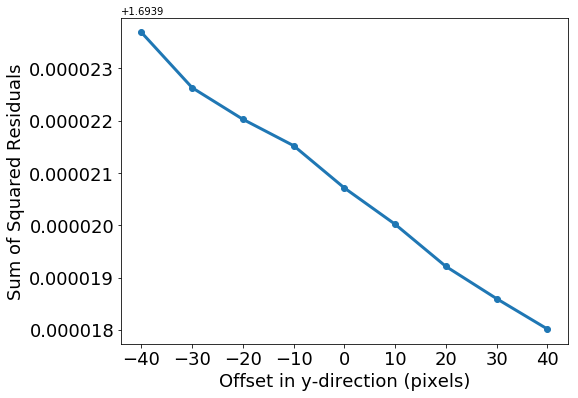

In [102]:
fig = plt.figure(figsize=(8,6))
plt.plot(offset_array, np.sqrt(ssrTotalVals), '-o', lw=3)
plt.xlabel('Offset in y-direction (pixels)', size=18)
plt.ylabel('Sum of Squared Residuals', size=18)
plt.xticks(size=18)
plt.yticks(size=18)

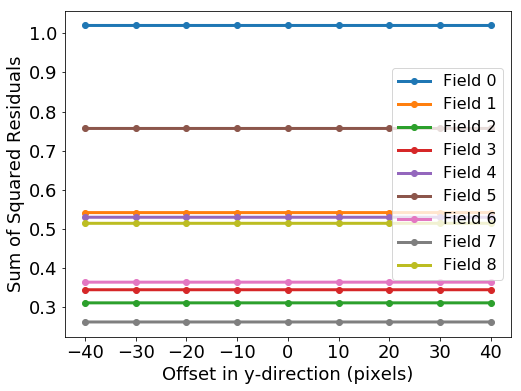

In [104]:
fig = plt.figure(figsize=(8,6))
for i in range(9):
    plt.plot(offset_array, np.sqrt(np.array(ssrFieldVals)[:, i]), '-o', lw=3, label='Field %i' % i)
plt.xlabel('Offset in y-direction (pixels)', size=18)
plt.ylabel('Sum of Squared Residuals', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=16)

## Offsets in the x-direction

In [111]:
offset_array = np.arange(-40, 41, 10)
ang_array = [90]*len(offset_array)
ssrTotalVals = []
ssrFieldVals = []
for offset, ang in zip(offset_array, ang_array):
    opdZkFilePath = os.path.join(data_dir, 'opd.zer.centroid.%iang%i' % (offset, ang))
    wfsZkFilePath = os.path.join(data_dir, 'wfs.zer.centroid.%iang%i' % (offset, ang))
    opdData, wfsData = calcCentroidMetrics.loadZernikeData(opdZkFilePath, wfsZkFilePath)
    zerFieldSSR, zerTotalSSR = calcCentroidMetrics.calcSSR(opdData, wfsData)
    ssrFieldVals.append(zerFieldSSR)
    ssrTotalVals.append(zerTotalSSR)

(array([1.693916, 1.693917, 1.693918, 1.693919, 1.69392 , 1.693921,
        1.693922, 1.693923, 1.693924]), <a list of 9 Text yticklabel objects>)

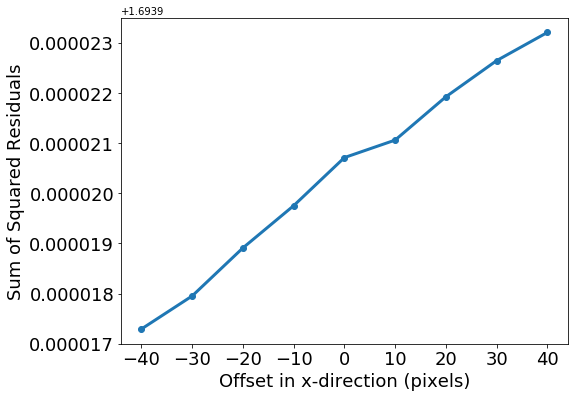

In [112]:
fig = plt.figure(figsize=(8,6))
plt.plot(offset_array, np.sqrt(ssrTotalVals), '-o', lw=3)
plt.xlabel('Offset in x-direction (pixels)', size=18)
plt.ylabel('Sum of Squared Residuals', size=18)
plt.xticks(size=18)
plt.yticks(size=18)

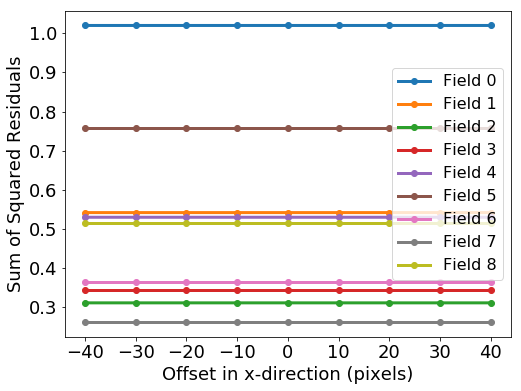

In [113]:
fig = plt.figure(figsize=(8,6))
for i in range(9):
    plt.plot(offset_array, np.sqrt(np.array(ssrFieldVals)[:, i]), '-o', lw=3, label='Field %i' % i)
plt.xlabel('Offset in x-direction (pixels)', size=18)
plt.ylabel('Sum of Squared Residuals', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=16)

## Offsets in random directions

In [114]:
offset_array = np.arange(0, 51, 10)
ang_array = [8, 128, 167, 117, 104, 228]
ssrTotalVals = []
ssrFieldVals = []
for offset, ang in zip(offset_array, ang_array):
    opdZkFilePath = os.path.join(data_dir, 'opd.zer.centroid.%iang%i' % (offset, ang))
    wfsZkFilePath = os.path.join(data_dir, 'wfs.zer.centroid.%iang%i' % (offset, ang))
    opdData, wfsData = calcCentroidMetrics.loadZernikeData(opdZkFilePath, wfsZkFilePath)
    zerFieldSSR, zerTotalSSR = calcCentroidMetrics.calcSSR(opdData, wfsData)
    ssrFieldVals.append(zerFieldSSR)
    ssrTotalVals.append(zerTotalSSR)

(array([2.869364, 2.869366, 2.869368, 2.86937 , 2.869372, 2.869374,
        2.869376, 2.869378, 2.86938 ]), <a list of 9 Text yticklabel objects>)

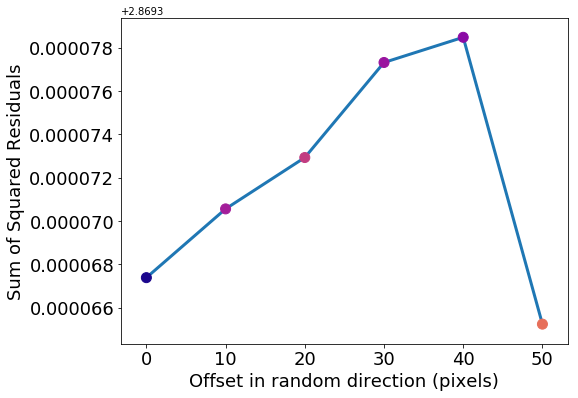

In [115]:
fig = plt.figure(figsize=(8,6))
plt.plot(offset_array, ssrTotalVals, lw=3)
plt.scatter(offset_array, ssrTotalVals, c=ang_array, zorder=10, s=100, cmap=plt.get_cmap('plasma'), vmin=0, vmax=360)
plt.xlabel('Offset in random direction (pixels)', size=18)
plt.ylabel('Sum of Squared Residuals', size=18)
plt.xticks(size=18)
plt.yticks(size=18)

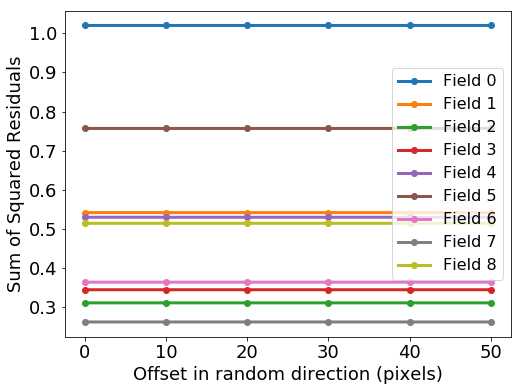

In [116]:
fig = plt.figure(figsize=(8,6))
for i in range(9):
    plt.plot(offset_array, np.sqrt(np.array(ssrFieldVals)[:, i]), '-o', lw=3, label='Field %i' % i)
plt.xlabel('Offset in random direction (pixels)', size=18)
plt.ylabel('Sum of Squared Residuals', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=16)